> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (movie dataset analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project is created to analyze TMDB movie  dataset  that contains information about 10,000 movies collected from
The Movie Database (TMDb), including user ratings and revenue.
 
> columns In dataset:
1.id - imdb_id - popularity -budget - revenue - original_title - cast - homepage - director - tagline - 
keywords -overview -runtime - genres - production_companies - release_date - vote_count - vote_average - release_year - budget_adj-revenue_adj 

>Questions: <br>
1-what is the Number of Produced Movies overyears? <br>
2-which movie geners generate more Profit ? <br>
3- what is the most produced  genres ? <br>
4-Which genres are most profitable? <br>
5-Which Year has the most profit? <br>
6-What are the top 10  popular production company ? <br>
7-Dose the movies with high budget generate more revenue? <br>
8-Dose the Runtime for the movie effects on the vote average? <br>
9-What kinds of properties are associated with movies that have more profit? <br>

>Project workflow <br>
1-Upload the libraries<br>  
2-read the CSV file <br>
3-clean data <br>
4-Investigate data <br>
5-visualize data & ducument the finding in the final section <br>


In [3]:
#Import All needed Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

### Reading data

In [4]:
#reading data form Csv
movie=pd.read_csv(r'C:\Users\Maram\Desktop\tmdb-movies.csv')
movie.head()
movie.shape

(10866, 21)

the dataset has 10866 row and 21 columns 


### Data Cleaning 

In [75]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 22 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The dataset containes so many null values as well as uncorrect data types for some columns. For that, i will convert the data type and impute or delete the missing values.
there is 3 way to deal with missing data 1-Imputing 2-Ignoring 3-Deletethe columns (if its not effect on the analysis),for this dataset i'm gonna do the following
1- Impute the (director,production_companies,genres) with ND(not defined) 
2- delete (tagline,keywords,overview,cast,imdb_id,homepage)

In [80]:
movie['director'] = movie['director'].fillna('ND')

movie['production_companies'] = movie['production_companies'].fillna('ND')
movie['genres'] = movie['genres'].fillna('ND')


In [81]:
movie = movie.drop(['cast', 'homepage', 'tagline', 'keywords', 'overview', 'imdb_id'], axis=1)

In [82]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10866 non-null object
runtime                 10866 non-null int64
genres                  10866 non-null object
production_companies    10866 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
Profit                  10866 non-null int64
dtypes: float64(4), int64(7), object(5)
memory usage: 1.3+ MB


In [83]:
sum(movie.duplicated())

1

In [84]:
movie.drop_duplicates(inplace=True)

In [85]:
sum(movie.duplicated())

0

In [86]:
movie['budget']=movie['budget'].replace(0,movie['budget'].mean())

movie['revenue']=movie['revenue'].replace(0,movie['revenue'].mean())

movie['budget_adj']=movie['budget_adj'].replace(0,movie['budget_adj'].mean())

movie['revenue_adj']=movie['revenue_adj'].replace(0,movie['revenue_adj'].mean())
movie['Profit']=movie['Profit'].replace(0,movie['Profit'].mean())

In [87]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null float64
revenue                 10865 non-null float64
original_title          10865 non-null object
director                10865 non-null object
runtime                 10865 non-null int64
genres                  10865 non-null object
production_companies    10865 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
Profit                  10865 non-null float64
dtypes: float64(7), int64(4), object(5)
memory usage: 1.4+ MB


 in this section i will Change data Types for Budget, revenue,budget_adj ,reveneu_adj and profit to int and relase_date to date type 

In [88]:
#from Object to date
movie['release_date']=pd.to_datetime(movie['release_date'])
#from float to int 
movie['budget_adj'] = movie['budget_adj'].astype(np.int64)
movie['revenue_adj'] = movie['revenue_adj'].astype(np.int64)
movie['budget'] = movie['budget'].astype(np.int64)
movie['revenue'] = movie['revenue'].astype(np.int64)
movie['Profit'] = movie['Profit'].astype(np.int64)
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
director                10865 non-null object
runtime                 10865 non-null int64
genres                  10865 non-null object
production_companies    10865 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null int64
revenue_adj             10865 non-null int64
Profit                  10865 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(9), object(4)
memory usage: 1.4+ MB


In this section i will split the production_companies and genres columns 

In [89]:
movie['production_companies'] = movie['production_companies'].apply(lambda x: x.split('|')[0])

In [90]:
movie['production_companies'].head(15)

0                          Universal Studios
1                  Village Roadshow Pictures
2                       Summit Entertainment
3                                  Lucasfilm
4                         Universal Pictures
5                        Regency Enterprises
6                         Paramount Pictures
7     Twentieth Century Fox Film Corporation
8                         Universal Pictures
9                       Walt Disney Pictures
10                         Columbia Pictures
11                 Village Roadshow Pictures
12                                 DNA Films
13                         Columbia Pictures
14                            Marvel Studios
Name: production_companies, dtype: object

In [91]:
movie['genres'] = movie['genres'].apply(lambda x: x.split('|')[0])

movie['genres'].head(11)

0              Action
1              Action
2           Adventure
3              Action
4              Action
5             Western
6     Science Fiction
7               Drama
8              Family
9              Comedy
10             Action
Name: genres, dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> in this section I will explore the data and the relations between columns in order to get insight for the dataset.


##  Exploring Data


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000182299A9668>,
      dtype=object)

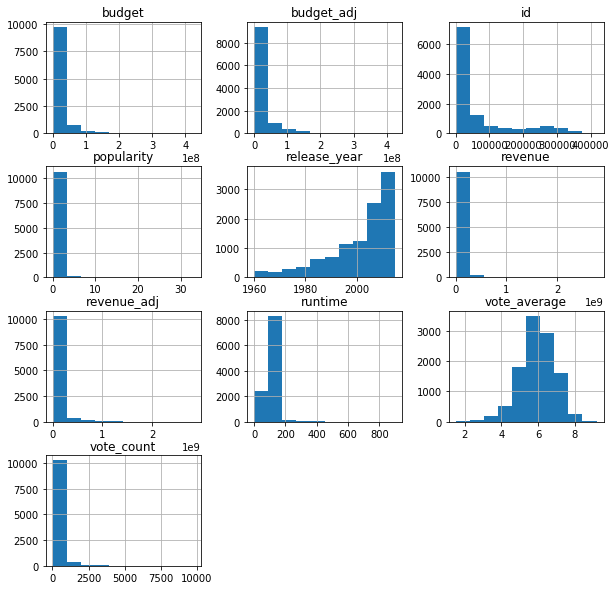

In [6]:
movie.hist(figsize=(10,10))

In [106]:
movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profit
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,2.229110e+07,6.187923e+07,102.071790,217.399632,5.975012,2001.321859,2.675046e+07,7.981225e+07,3.611640e+07
std,92134.091971,1.000231,2.801385e+07,1.110236e+08,31.382701,575.644627,0.935138,12.813260,3.051007e+07,1.365647e+08,9.452843e+07
min,5.000000,0.000065,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,2.000000e+00,-4.139124e+08
25%,10596.000000,0.207575,1.462429e+07,3.982690e+07,90.000000,17.000000,5.400000,1995.000000,1.754989e+07,5.136900e+07,7.290430e+05
50%,20662.000000,0.383831,1.462429e+07,3.982690e+07,99.000000,38.000000,6.000000,2006.000000,1.754989e+07,5.136900e+07,2.520261e+07
75%,75612.000000,0.713857,1.500000e+07,3.982690e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,5.136900e+07,2.520261e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09


 the data is cleand and in a good shape

## what is the Number of Produced Movies overyears?

In [27]:
R = movie.groupby('release_year').count()['id']
R.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

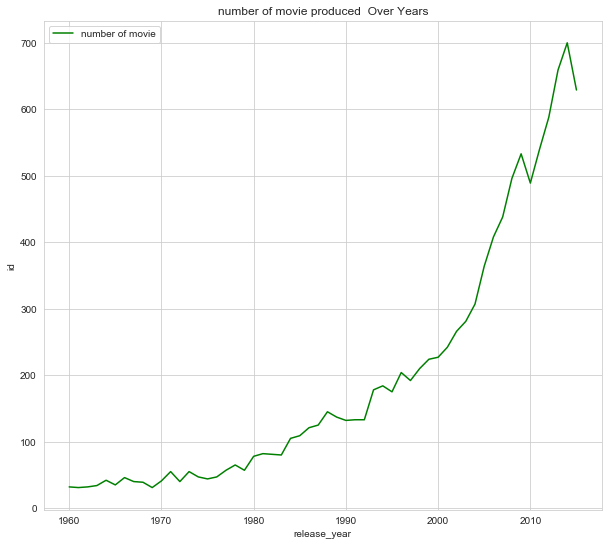

In [111]:
index_mean = R.index
sns.set_style('whitegrid')
#set x, y axis data
#x1, y1 for mean data; x2, y2 for median data
x1, y1 = index_mean, R
#set size
plt.figure(figsize=(10, 9))
#plot line chart for mean and median
plt.plot(x1, y1, color = 'g', label = 'number of movie')
#set title and labels
plt.title('number of movie produced  Over Years')
plt.xlabel('release_year')
plt.ylabel('id');
#set legend
plt.legend(loc='upper left')

#### as showen in the above graph the number of produced movies  significantly increased over years

#  which movie geners  generate more Profirt ?

In [94]:
def movie_info(x):
    #here i used the function 'idmin' to find the index of lowest profit movie.
    lowest = movie[x].idxmin()
    #here i used the function 'idmax' to find the index of Highest profit movie.
    highest  = movie[x].idxmax()
    high = pd.DataFrame(movie.loc[highest,:])
    low = pd.DataFrame(movie.loc[lowest,:])
    
    #print the movie with high and low profit
    print("Movie with Highest profit: ",movie['original_title'][highest])
    print("Movie with Lowest profit: ",movie['original_title'][lowest])
   
 # call the movie_info function.
movie_info('Profit')


Movie with Highest profit:  Avatar
Movie with Lowest profit:  The Warrior's Way


In [95]:
#find the records for the movies
movie[movie['original_title'].str.contains('Avatar')  | movie['original_title'].str.contains("The Warrior's Way")]

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profit
1386,19995,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action,Ingenious Film Partners,2009-12-10,8458,7.1,2009,240886902,2827123750,2544505847
2244,46528,0.250540,425000000,11087569,The Warrior's Way,Sngmoo Lee,100,Adventure,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,425000000,11087569,-413912431


###  the analysis show that  the Movie with Highest profit is Avatar &Movie with Lowest profit is The Warrior's Way

## what is the most produced  genres ?

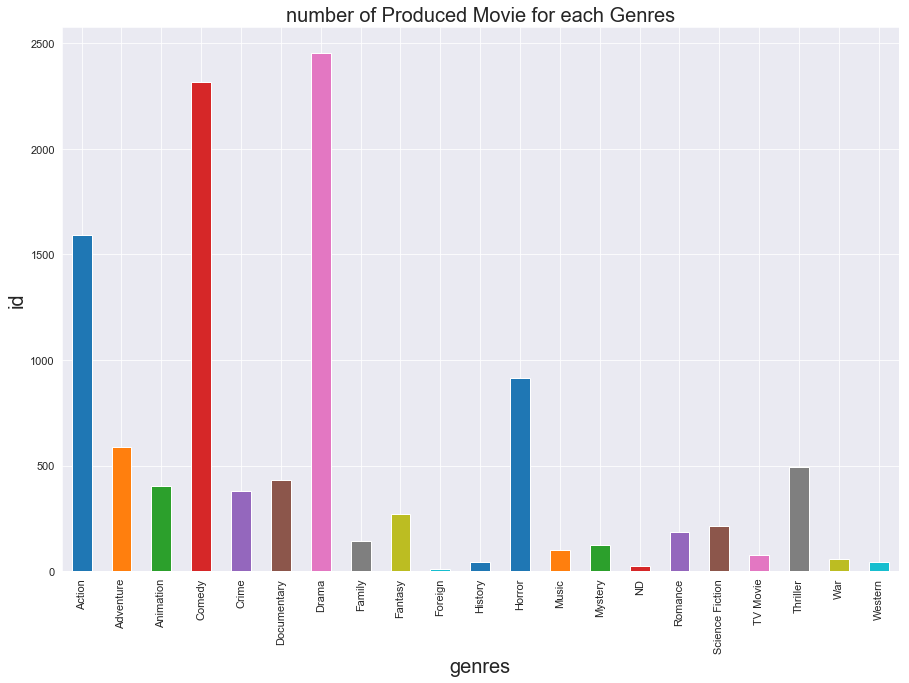

In [96]:
L = movie.groupby('genres').count()['id']  
L.tail(20)
L.plot(x='genres',kind='bar',figsize = (15,10),fontsize=11)
plt.title('number of Produced Movie for each Genres' ,fontsize = 20)
plt.xlabel('genres',fontsize = 20)
plt.ylabel('id',fontsize = 20)
sns.set_style("darkgrid")


### Drama movie is most produced generse according to the above chart

# Which genres are most profitable?

In [43]:
D = movie.groupby('genres').mean()['Profit']
D.head(100)


genres
Action             4.448120e+07
Adventure          9.239292e+07
Animation          6.522345e+07
Comedy             3.000915e+07
Crime              2.807139e+07
Documentary        2.038550e+07
Drama              2.515231e+07
Family             5.783739e+07
Fantasy            5.375947e+07
Foreign            2.520261e+07
History            3.873625e+07
Horror             2.265207e+07
Music              2.613357e+07
Mystery            2.514187e+07
ND                 2.410663e+07
Romance            3.827213e+07
Science Fiction    6.502604e+07
TV Movie           2.387552e+07
Thriller           2.584745e+07
War                3.588848e+07
Western            2.057488e+07
Name: Profit, dtype: float64

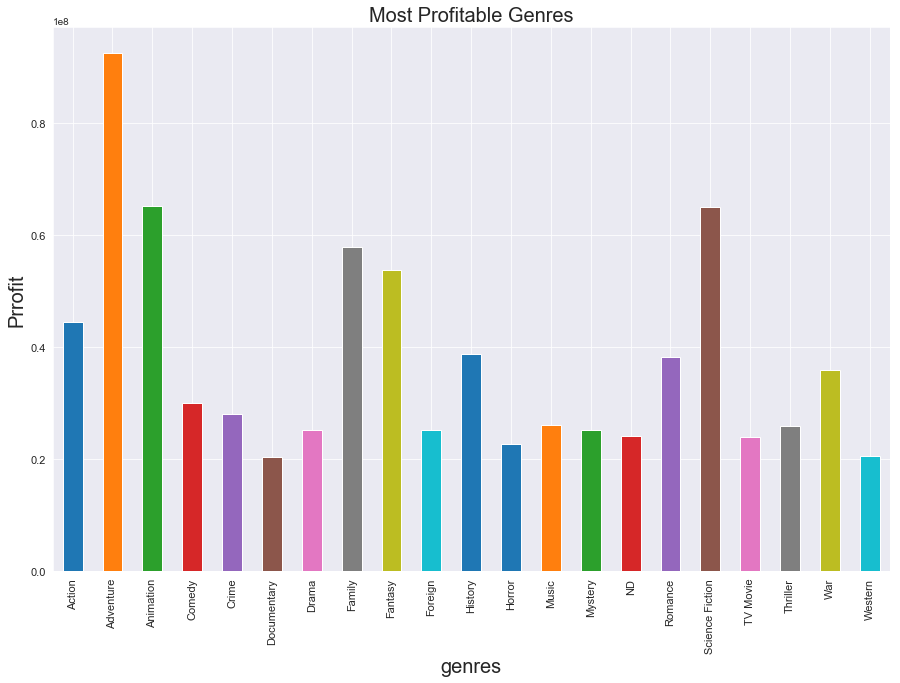

In [97]:
D = movie.groupby('genres').mean()['Profit']  
D.tail(20)
D.plot(x='genres',kind='bar',figsize = (15,10),fontsize=11)
plt.title('Most Profitable Genres' ,fontsize = 20)
plt.xlabel('genres',fontsize = 20)

plt.ylabel('Prrofit',fontsize = 20)
sns.set_style("darkgrid")

### the above  chart shows that the adventure movies generate more profit

## Which Year has the most profit?


In [98]:
L = movie.groupby('release_year').mean()['Profit']  
L.tail(100)

release_year
1960    2.038134e+07
1961    2.403968e+07
1962    1.762811e+07
1963    1.966267e+07
1964    2.518040e+07
1965    2.836398e+07
1966    1.921893e+07
1967    2.916093e+07
1968    1.851407e+07
1969    2.277033e+07
1970    2.531994e+07
1971    2.018535e+07
1972    2.469264e+07
1973    3.573225e+07
1974    2.744739e+07
1975    3.422895e+07
1976    2.999428e+07
1977    4.647488e+07
1978    3.026563e+07
1979    3.481471e+07
1980    2.804414e+07
1981    2.630398e+07
1982    3.490287e+07
1983    2.834089e+07
1984    2.775635e+07
1985    2.598830e+07
1986    2.586720e+07
1987    3.069089e+07
1988    2.879410e+07
1989    3.809770e+07
1990    3.946793e+07
1991    3.421731e+07
1992    4.225030e+07
1993    3.658012e+07
1994    3.658269e+07
1995    4.487439e+07
1996    3.094620e+07
1997    3.849500e+07
1998    3.409971e+07
1999    3.317084e+07
2000    3.168196e+07
2001    4.168091e+07
2002    4.122860e+07
2003    4.162233e+07
2004    4.021291e+07
2005    3.461842e+07
2006    3.186758e+07


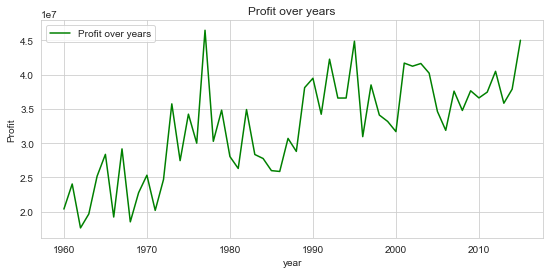

In [99]:
index_mean = L.index
sns.set_style('whitegrid')
#set x, y axis data
#x1, y1 for mean data; x2, y2 for median data
x1, y1 = index_mean, L
year = ['1960','1970','1980','1990','2000','2010','2015']
#set size
plt.figure(figsize=(9, 4))
#plot line chart for mean and median
plt.plot(x1, y1, color = 'g', label = 'Profit over years')
#set title and labels
plt.title('Profit over years')
plt.xlabel('year')
plt.ylabel('Profit');
#set legend
plt.legend(loc='upper left')

### according to the visualization  for profit and year columns the movies in 1970 generate the highest profit with     4.6 billion dollar

 # What are the top 10  popular production company ?

In [100]:
M = movie[['popularity', 'production_companies']].sort_values('popularity', ascending=False).nlargest(20, 'popularity')
M.head(30)


,popularity,production_companies
0,32.985763,Universal Studios
1,28.419936,Village Roadshow Pictures
629,24.949134,Paramount Pictures
630,14.311205,Marvel Studios
2,13.112507,Summit Entertainment
631,12.971027,Marvel Studios
1329,12.037933,Lucasfilm
632,11.422751,Thunder Road Pictures
3,11.173104,Lucasfilm
633,10.739009,Lionsgate


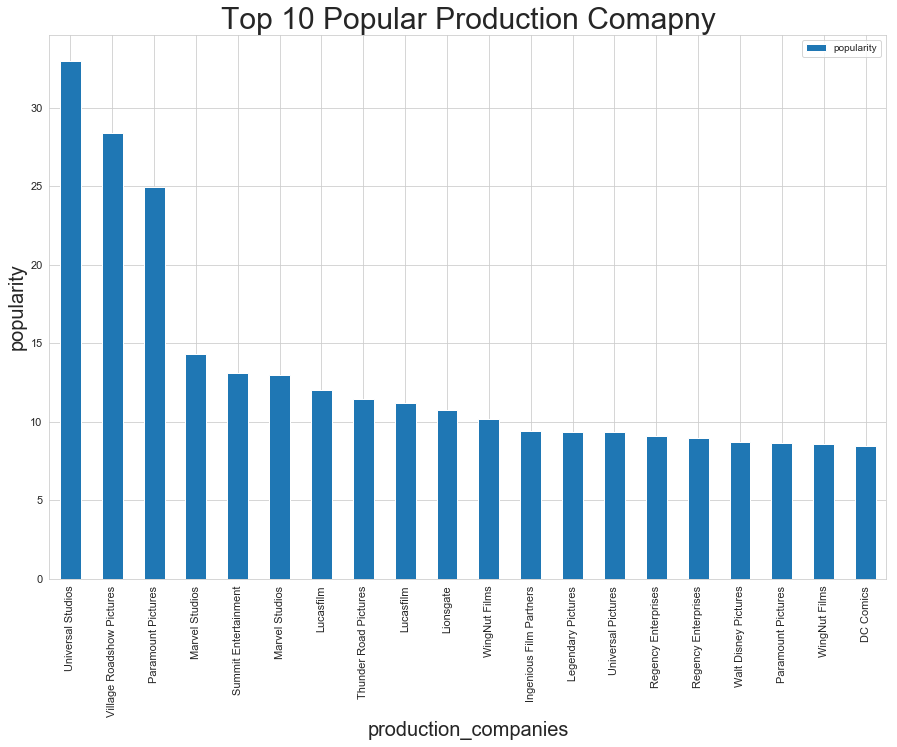

In [101]:
M.plot(x='production_companies',kind='bar',figsize = (15,10),fontsize=11)
plt.title('Top 10 Popular Production Comapny' ,fontsize = 30)
plt.xlabel('production_companies',fontsize = 20)
plt.ylabel('popularity',fontsize = 20)
sns.set_style("darkgrid")


### Universal Studios is the most popular production company

# Dose the movies with high budget generate more revenue?

In [50]:
K=movie[(movie['budget']>0) & (movie['revenue']>0)]

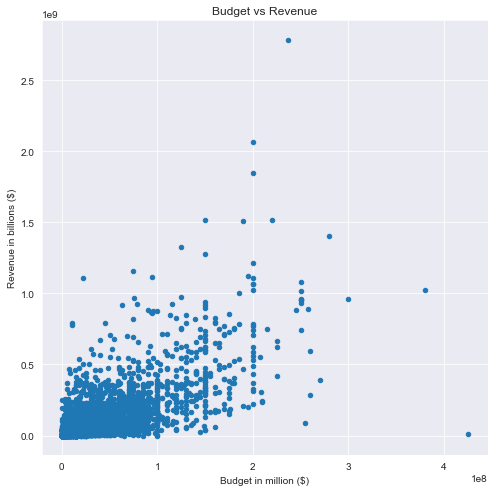

In [51]:
K.plot(x='budget',y='revenue',kind='scatter',figsize=(8,8));
plt.title('Budget vs Revenue')
plt.xlabel('Budget in million ($)');
plt.ylabel('Revenue in billions ($)');



In [59]:
movie['budget'].corr(movie['revenue'])

0.7054600324094381

### There is a positive relationship between budget and revenue in other word we can state that the more budget lead to more revenus

# Dose the Runtime for the movie effects on the vote average?

In [52]:
K=movie[(movie['vote_average']>0) & (movie['runtime']>0)]
movie['vote_average'].corr(movie['runtime'])

0.1568129694330444

In [53]:
K.shape

(10834, 16)

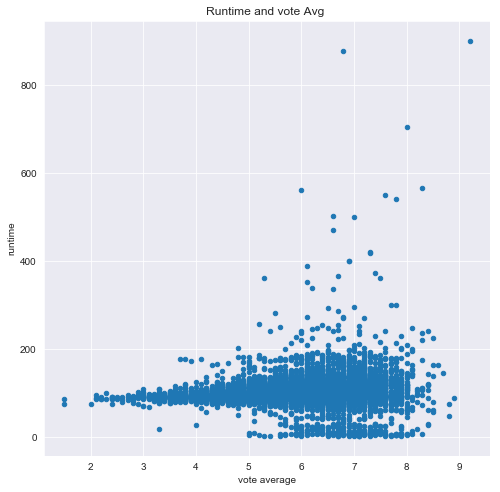

In [54]:
K.plot(x='vote_average',y='runtime',kind='scatter',figsize=(8,8));
plt.title('Runtime and vote Avg ')
plt.xlabel('vote average');
plt.ylabel('runtime');



### runtime for movie does not strongly correlate to high vote avrege .

# What kinds of properties are associated with movies that have more profit?

 ## Dose the popularity for the movie effects on its profit 

In [56]:
A=movie[(movie['Profit']>0) & (movie['popularity']>0)]
movie['popularity'].corr(movie['Profit'])

0.6029051460493342

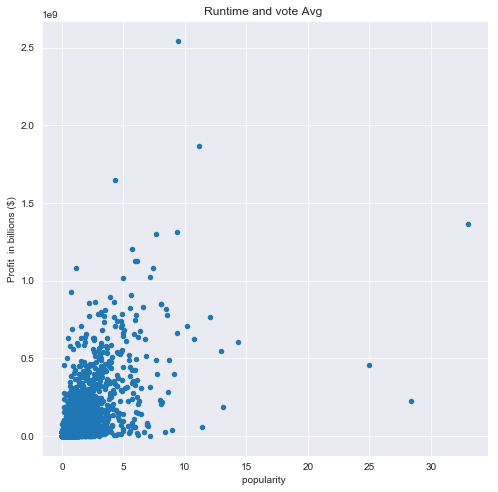

In [57]:
A.plot(x='popularity',y='Profit',kind='scatter',figsize=(8,8));
plt.title('Runtime and vote Avg ')
plt.xlabel('popularity ');
plt.ylabel('Profit  in billions ($)');

### There is a positive relationship between Popularity and Profit

## Dose the budget for the movie effects on its profit 

In [58]:
E=movie[(movie['Profit']>0) & (movie['budget']>0)]
movie['budget'].corr(movie['Profit'])

0.5473622073855918

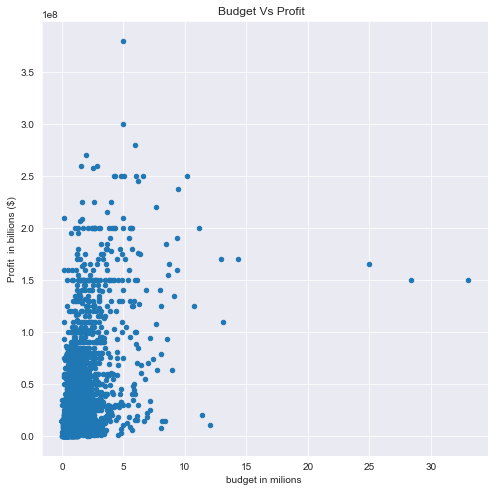

In [59]:
E.plot(x='popularity',y='budget',kind='scatter',figsize=(8,8));
plt.title('Budget Vs Profit  ')
plt.xlabel('budget in milions ');
plt.ylabel('Profit  in billions ($)');

### the profit& the budget have a positive relationship and thats mean the movies with high budget are most likley to generate more profit

# ## Dose the runtime for the movie effects on its profit 

In [104]:
Y=movie[(movie['Profit']>0) & (movie['runtime']>0)]
movie['Profit'].corr(movie['runtime'])

0.11791465274208612

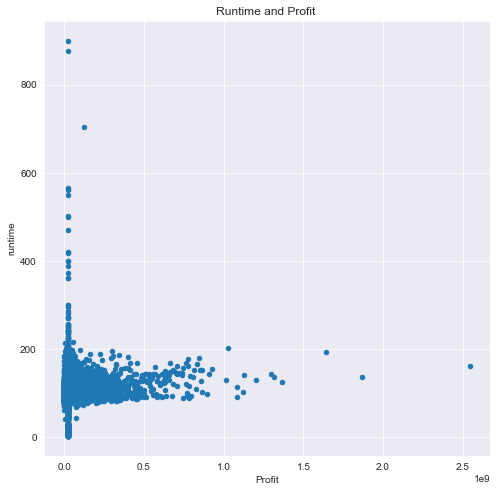

In [105]:
Y.plot(x='Profit',y='runtime',kind='scatter',figsize=(8,8));
plt.title('Runtime and Profit ')
plt.xlabel('Profit');
plt.ylabel('runtime');


### as appear in the scatter plot and corrolation number 0.11 the profit& the runtime have a very weak positive relationship


## Conclusions
- Number of produced movies significantly increased after 2000 
- the most produced  movie geners is drama, comedy and action 
- the advanture movies Generate more profit
- Maximum profit of Movies was  In year 1977
- Movie with Highest profit:  Avatar
- Movie with Lowest profit:  The Warrior's Way
- Universal Studios is the most popular Production company 
- movies with high budget generate more revenue
- the profit  generated by movie is associated with its budget and pupularity 


## Limitation 
- Alot of missing data for (tagline,keywords,overview,cast) Columns, I could use these columns to make keyword cloud to represent the most pupular keywords or the relationship between keywords and pupularity but with so much 'unknown values" i dont think the reaults would be accurate. also, the cast columns would be usfull to find what is the puplarity for the movies  based on the actors  

- there is no  specific Unit for the budget and revenue columns so  I assumed its on dollar 
- there is outliers in the profit and budget 
- the dataset is old, i would prefare to work with dataset fro 2000 to 2018
- using Jupyter and anaconda for firsttime wasn't that easy at the beginning.

